# House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [64]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

In [13]:
data = pd.read_csv('kc_house_data_NaN.csv', )

In [14]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
data.shape

(21613, 22)

In [16]:
df=data.copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,1.080600e+04,6.239280e+03,0.000000e+00,5.403000e+03,1.080600e+04,1.620900e+04,2.161200e+04
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21600.0,3.372870e+00,9.266567e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21603.0,2.115736e+00,7.689959e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


In [19]:
df.drop(columns=['Unnamed: 0', 'id'], axis=1, inplace=True)

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.372870,0.926378,1.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.115736,0.768818,0.5000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [21]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

- Bedrooms has 13 missing values and Bathroom has 10 missing values

In [23]:
#Replace the missing values in bedroom with it mean
bedroom_mean = df.bedrooms.mean()
df.bedrooms.replace(np.nan, bedroom_mean, inplace=True)

In [24]:
#Replace the missing values in bathroom with it mean
bathroom_mean = df.bathrooms.mean()
df.bathrooms.replace(np.nan, bathroom_mean, inplace=True)

In [25]:
# sanity Check
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
#Check number of houses with unique floors and convert to dataframe
df.floors.value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [33]:
df[df['waterfront']==1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,20150311T000000,1350000.0,3.0,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
230,20150413T000000,655000.0,2.0,1.75,1450,15798,2.0,1,4,3,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
246,20140929T000000,2400000.0,4.0,2.50,3650,8354,1.0,1,4,3,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
264,20141027T000000,369900.0,1.0,0.75,760,10079,1.0,1,4,5,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
300,20140624T000000,3075000.0,4.0,5.00,4550,18641,1.0,1,4,3,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19984,20150317T000000,1898000.0,3.0,2.50,2830,4334,3.0,1,4,3,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20325,20140811T000000,3000000.0,3.0,3.50,4410,10756,2.0,1,4,3,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20767,20150417T000000,2300000.0,4.0,4.00,4360,8175,2.5,1,4,3,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21201,20141008T000000,2230000.0,3.0,3.50,3760,5634,2.0,1,4,3,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


Text(0.5, 1.0, 'Boxplot of Price by Waterfront')

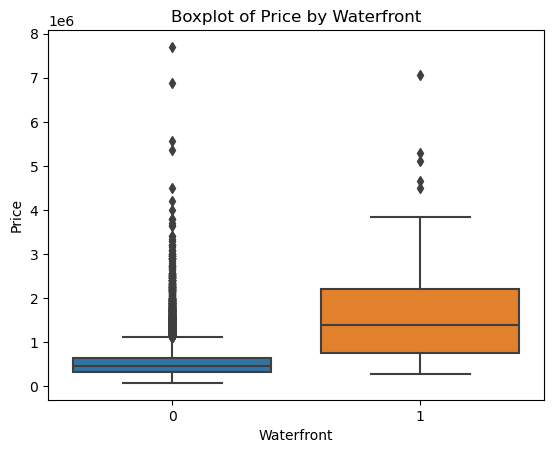

In [75]:
sb.boxplot(x=df['waterfront'], y=df['price'])
# Set labels for the x and y axes
plt.xlabel('Waterfront')
plt.ylabel('Price')

# Set the title of the plot
plt.title('Boxplot of Price by Waterfront')

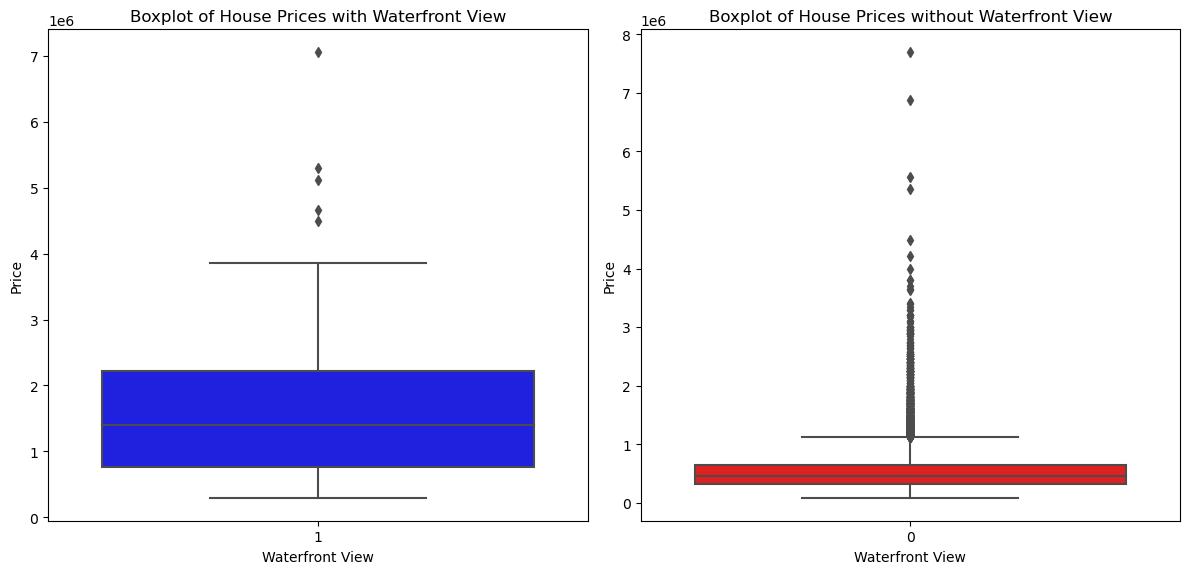

In [45]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for houses with a waterfront view (Waterfront == 1)
sb.boxplot(x='waterfront', y='price', data=df[df['waterfront'] == 1], color='blue', ax=axes[0])
axes[0].set_title('Boxplot of House Prices with Waterfront View')
axes[0].set_xlabel('Waterfront View')
axes[0].set_ylabel('Price')

# Boxplot for houses without a waterfront view (Waterfront == 0)
sb.boxplot(x='waterfront', y='price', data=df[df['waterfront'] == 0], color='red', ax=axes[1])
axes[1].set_title('Boxplot of House Prices without Waterfront View')
axes[1].set_xlabel('Waterfront View')
axes[1].set_ylabel('Price')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

- The houses without the waterfront view has more prices outliers

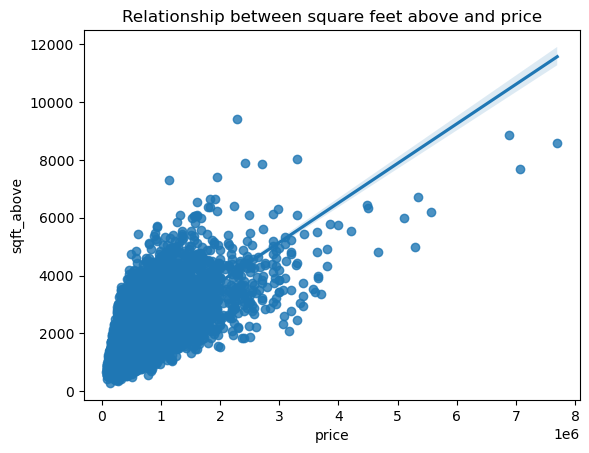

In [51]:
sb.regplot(data=df, x='price', y='sqft_above')
plt.title('Relationship between square feet above and price')
plt.show()

- There is positive relationship between square feet above and price

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\2001483470.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

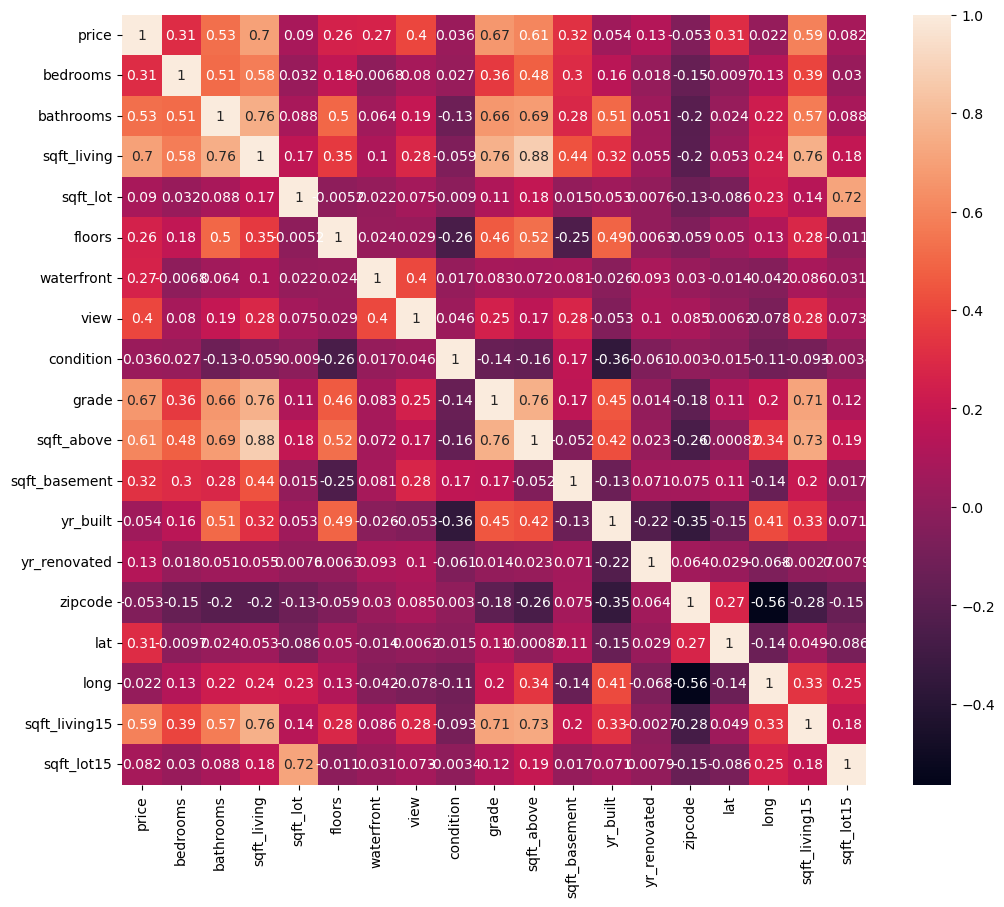

In [53]:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(), annot=True)

- We have the issue of multicollinearity here because alot of them have a relationshi greater than 0.7

# Model Development

#### Linear Regression Using 'long' as the predictor

In [57]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

#### Linear Regression Using 'sqft_living' as the predictor

In [59]:
X = df[['sqft_living']]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X,Y)
score=lm1.score(X, Y)
print("R-squared:", score)

R-squared: 0.4928532179037931


#### Linear Regression using "floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living" as the dependent variables

In [60]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']
lm2 = LinearRegression()
lm2.fit(X,Y)
score=lm2.score(X, Y)
print("R-squared:", score)

R-squared: 0.6576951666037504


#### Linear Regression Using Pipeline that consist of standard scaler, polynomial and linear regression

In [62]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

# Create a pipeline object
pipeline = Pipeline(Input)

# Fit the pipeline using the features and target variable
pipeline.fit(X,Y)

# Predict 'price' using the pipeline
predicted_price = pipeline.predict(X)

# Calculate the R-squared value
r_squared = r2_score(Y, predicted_price)

print("R-squared:", r_squared)


R-squared: 0.7513402173516526


#### Ridge Regression

In [76]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms",
           "sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

model = Ridge(alpha=0.1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6478759163939112

#### Second Order Polynomial function with Ridge

In [69]:

# Perform a second-order polynomial transform on both training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Create and fit a Ridge regression object with regularization parameter 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

# Predict the target values using the Ridge model
y_pred = ridge.predict(X_test_poly)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.7002744255964455
